
# Logistic Regression with Python - Titanic


Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables. It requires discrete data that falls into one of two possibilites i.e 0 or 1.

<img src="logistic regression.png" width="500" height="500" align="left">
<br>

**Advantages**
- Simple model thats easy to understand.
- The predicted parameters give insight to which features are important since we're looking at 0 or 1.

**Disadvantages**
- Cannot solve non linear problems.





We'll be trying to predict a classification- survival or deceased.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#allows me to view the plots below the cells inline
%matplotlib inline 

## 1. Reading the data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

I will be using this data only to train the model.

In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here we can see the data in a snapshot. 

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see here that there are 891 rows of data and 12 columns.

## 2. Data Visualisation

In this section I will be looking at different features to gain some insight to any trends. 

Lets first look at the correlation between the 'Survived' column and the other columns

In [5]:
titanic.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

We can see a significant correlation with the 'Pclass' and 'Fare' column. We will look at these in this section. 

Lets look at how many people survived 

<AxesSubplot:xlabel='Survived', ylabel='count'>

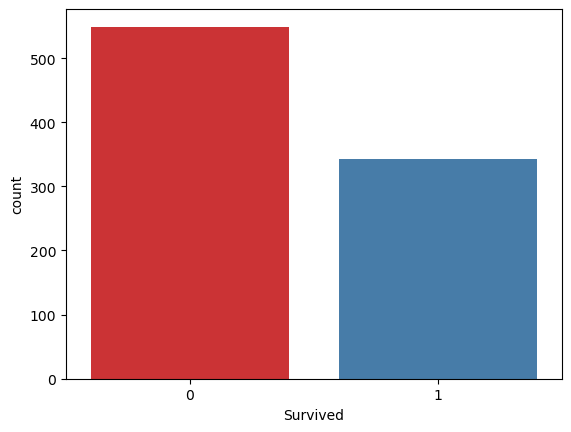

In [6]:
sns.countplot(x='Survived',data=titanic,palette='Set1')

We can see that more people died than survived. 

Lets look at how this differed for gender

<AxesSubplot:xlabel='Survived', ylabel='count'>

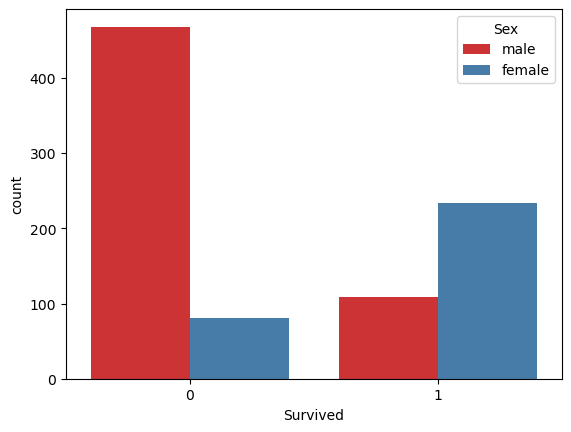

In [7]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='Set1')

Interesting but makes sense. More males died and more females survived.

In an emergency situation generally, females and children are prioritised.

Lets look at how many people survived based on what class they were in

<AxesSubplot:xlabel='Survived', ylabel='count'>

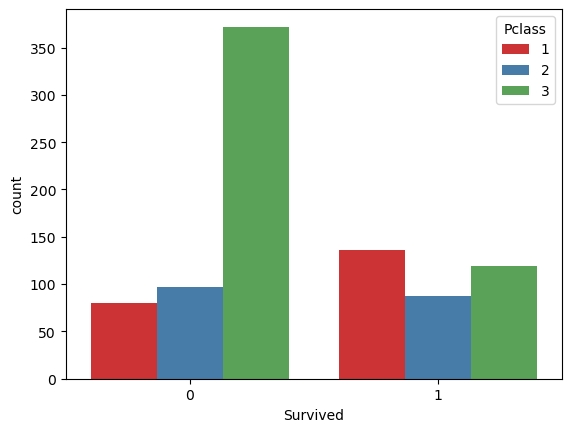

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='Set1')

Here we can see that if you were in 3rd class then you were overwhemingly likely to die. However, this could be becasuse there were simply more people in 3rd class compared to the others, skewing the data. 

Lets look at how many people were in each class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

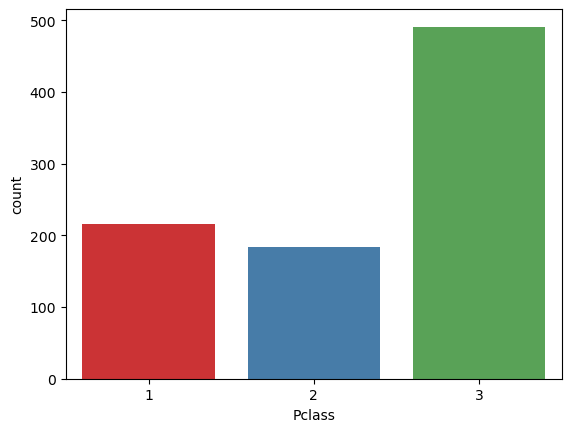

In [9]:
sns.countplot(x='Pclass', data=titanic, palette='Set1' )

This matches our hypothesis that there were much more people in 3rd class

Lets look at the proportion of people who survived in each class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='Percentage of survival'>

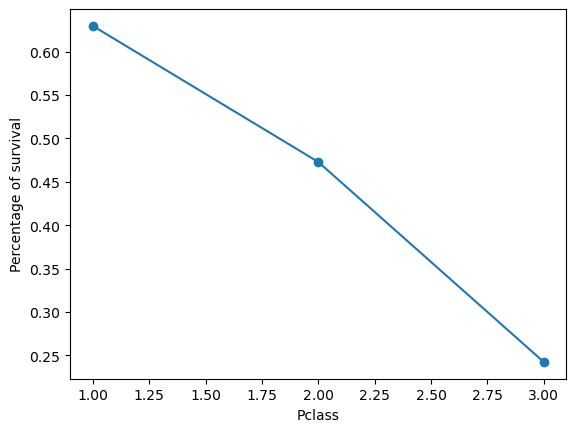

In [10]:
percentage_of_survival = titanic.groupby(['Pclass'])['Survived'].mean()
print(percentage_of_survival)
percentage_of_survival.plot(ylabel='Percentage of survival',marker = 'o')


Here you can clearly see that only 24% of people survived in 3rd class compared to 63% in 1st class!

Lets look at the distribution of age

<AxesSubplot:>

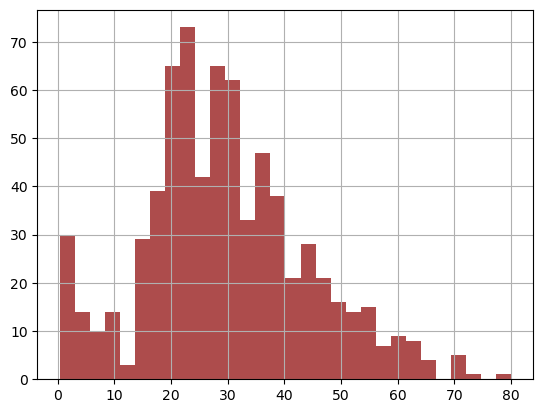

In [11]:
titanic['Age'].hist(bins=30,color='darkred',alpha=0.7)

We can see that the data skews toward more younger people with a spike in 0-10 year olds

Lets look at the 'SibSp' column


<AxesSubplot:xlabel='SibSp', ylabel='count'>

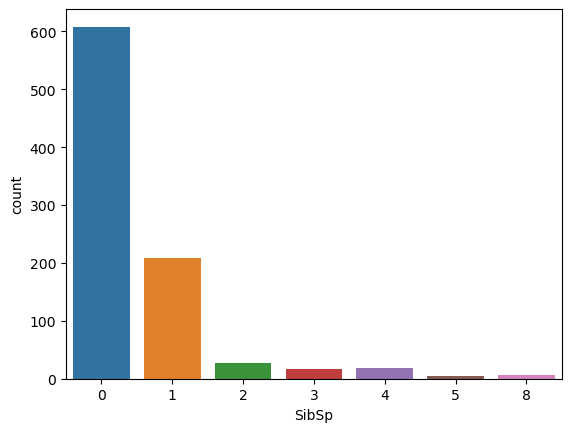

In [12]:
sns.countplot(x='SibSp',data=titanic)

Here we can see the there are a lot of 0's meaning single people and the rest seem to be a majority of 1 which is spouse. 

There aren't many siblings on board. 

Lets look at the distribution of ticket price. We found a significant correlation here earlier. 


<AxesSubplot:>

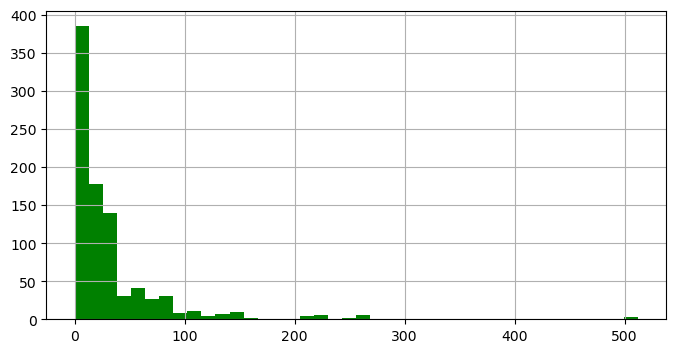

In [13]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

We can see that most people bought cheaper tickets here with the majority spending less than 50 on tickets

## 3. Exploratory Data Analysis


### Missing Data

- Lets see if there is any missing data. 
- We can use a heatmap in seaborn to look at this. 

<AxesSubplot:>

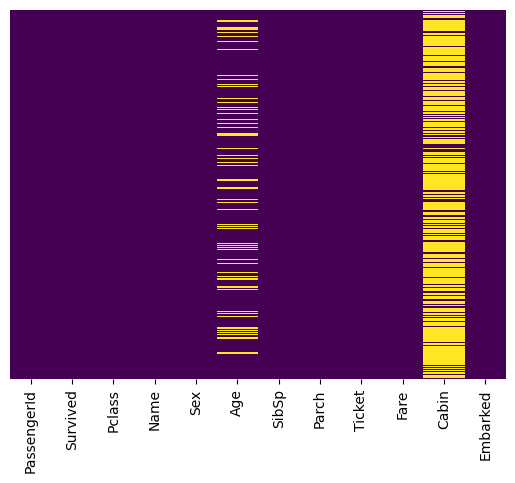

In [14]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
print("Roughly {}% of Age data is missing".format((titanic['Age'].isnull().sum()/len(titanic.index)).round(decimals=2)*100))



Roughly 20.0% of Age data is missing


In [16]:
print("Roughly {}% of Cabin data is missing".format((titanic['Cabin'].isnull().sum()/len(titanic.index)).round(decimals=2)*100))


Roughly 77.0% of Cabin data is missing


- The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 
- Looking at the 'Cabin' column, it looks like we are just missing too much of that data to do something useful with at a basic level so we'll drop this later on

### Cleaning  data

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).


However we can be smarter about this and check the average age by passenger class. 

Lets look at the correlation between Age and other columns


In [17]:
titanic.corr()['Age']

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Name: Age, dtype: float64

We can see that there is a slight negative correlation between Age and Pclass

Lets look further

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

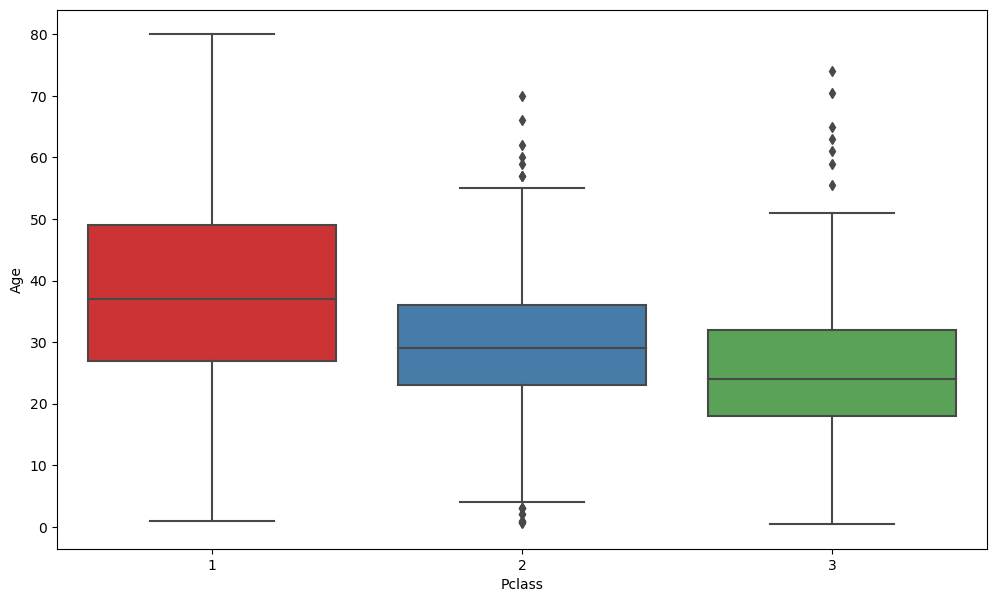

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='Set1')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. It takes time to acquire wealth and so we can even assume that those who are older will have more money. 

We'll use these average age values to impute based on Pclass for Age.

In [19]:
avg_age_per_class = titanic.groupby(['Pclass'])['Age'].mean()
avg_age_per_class
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38.233441

        elif Pclass == 2:
            return 29.877630

        else:
            return 25.140620

    else:
        return Age

Now apply the function

In [21]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now let's check that heat map again.

<AxesSubplot:>

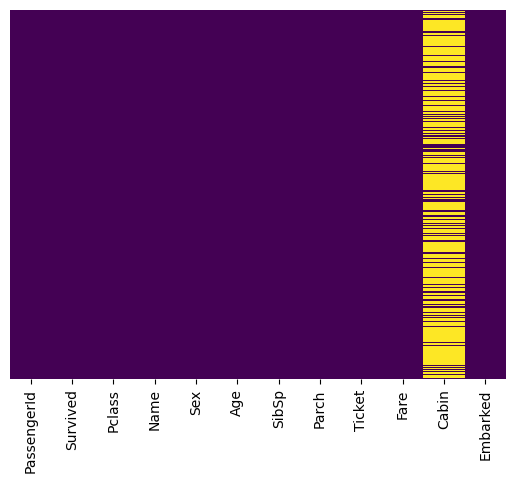

In [22]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Lets drop the 'Cabin' column

In [23]:
titanic.drop('Cabin',axis=1,inplace=True)


In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
titanic.dropna(inplace=True)

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


I'll also drop the 'Name' and and 'Ticket' columns as they have a lot of text which is difficult to encode for the machine learning algorithm. 

In [27]:
titanic.drop(['Name','Ticket'], axis=1, inplace=True)

Check the heatmap again. There should be no ticks and it should all be purple.

<AxesSubplot:>

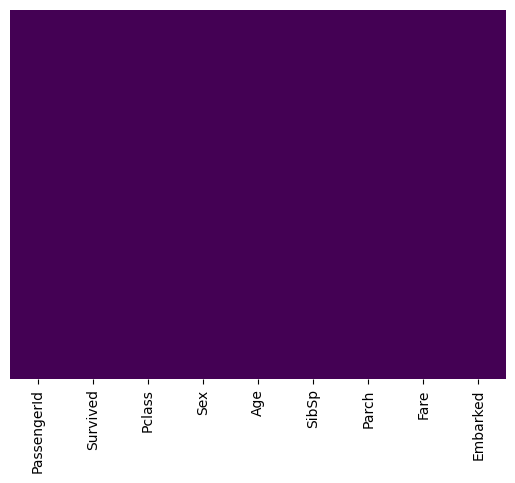

In [28]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing data!

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


The 'Sex' and 'Embarked' columns can be converted into dummy variables. After this is done, all of our data will be in number format which is perfect for our algorithm.

In [30]:
#Here we use the drop_first parameter to drop 1 column because we know that if someone is male then the other person is 100% female. 
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [31]:
titanic.drop(['Sex','Embarked'],axis=1,inplace=True)


In [32]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1



## Building a Logistic Regression model

Let's start by splitting our data into a training set and test set. I will use 70% of the data for training and 30% of the data for testing. 

### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

Lets split our data into X (data) and y (what we want to predict)

In [35]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training and Predicting

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
predictions = logmodel.predict(X_test)

The model has been trained and predictions have been made. Lets evaluate the model. 

## Evaluating the model

We can check precision,recall,f1-score using classification report!

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

Lets look at the confusion matrix

In [41]:
print(confusion_matrix(y_test,predictions))

[[149  14]
 [ 33  71]]


- The model made 267 predictions. 
- The model predicted that 182 people died and 85 people survived. 
- In reality, 63 people died and 104 people survived.




- There were 149 True Negatives (149 people were predicted dead, and actually died). 
- There were 71 True Positives (71 people were predicted survived, and actually survived).
- There were 14 False Positives (14 people were predicted survived, but acutally died).
- There were 33 False Negatives (33 people were predicted dead, but actually survived). 


Lets look at the classification report

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



Accuracy
- The model had an overall accuracy of 82%, meaning out of all predictions 82% were correct. 

Precision
- 82% of people who were predicted to die, died.
- 84% of people who were predicted to live, lived.

Recall
- 91% of people who actually died, were predicted to die.
- 68% of people who actually lived, were predicted to live.

Some ways to improve the model would have been to try and use the cabin data. Since there was so much data missing, I could've turned the column into a 'Had cabin?' binary column. 
Another way would've have been to try and extract some data from the Area column and used that.